In [79]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [80]:
# X_train=pd.read_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_train.csv')
# X_test=pd.read_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_test.csv')
# y_train=pd.read_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_train.csv')
# y_test=pd.read_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_test.csv')

X_train=pd.read_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_train_no_scale.csv')
X_test=pd.read_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_test_no_scale.csv')
y_train=pd.read_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_train_no_scale.csv',names = ['SalePrice'])
y_test=pd.read_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_test_no_scale.csv',names = ['SalePrice'])

In [81]:
X_train.head(2)

,LandSlope,GarageCond,FullBath,LotShape,BsmtFinSF1,BsmtFinSF2,GarageYrBlt_years,BsmtExposure,Exterior1st,New,Slab,ExterCond,Alley,Family,RH,GarageType,ScreenPorch,Inside,Duplex,YrSold,MSSubClass,BsmtFinType1,CBlock,Neighborhood,Condition1,GarageYrBlt,Twnhs,1stFlrSF,Hip,Low,GarageArea,OverallQual,HLS,KitchenAbvGr,TwnhsE,YearRemodAdd_years,SBrkr,TotalBsmtSF,LotFrontage,CulDSac,LowQualFinSF,LotArea,RL,None,OverallCond,BsmtCond,MiscVal,TotRmsAbvGrd,FuseF,PavedDrive,Exterior2nd,PoolQC,EnclosedPorch,WoodDeckSF,MasVnrArea,FireplaceQu,RM,Lvl,FR2,BsmtFullBath,GarageCars,YearBuilt_years,YearBuilt,MoSold,Rare_var,BsmtHalfBath,HalfBath,PConc,GrLivArea,OpenPorchSF,KitchenQual,BedroomAbvGr,3SsnPorch,HeatingQC,Street,GarageQual,Fence,HouseStyle,GarageFinish,Fireplaces,Id,ExterQual,WD,2fmCon,BsmtFinType2,YearRemodAdd,CentralAir,Shed,SalePrice,Functional,BsmtUnfSF,Normal,Stone,PoolArea,2ndFlrSF,BsmtQual,Partial,TotalSF
0,4,5,1,3,1721,0,1.0,4,468,1,0,5,0,0,0,789,0,0,0,2006,20,8,0,76,25,2005.0,0,7.648263,0,0,1134,8,0,1,0,0,1,2077,3.891820,1,0,9.947313,1,1,5,5,0,8,0,4,459,0,0,192,0.0,7,0,1,0,1,3,1,2005,1,0,0,1,1,7.648263,267,7,1,0,7,4,5,0,643,5,1,665,6,0,0,3,2006,3,0,12.955127,8,356,0,0,0,0,7,1,2084.648263
1,4,5,2,4,0,0,1.0,4,468,1,0,5,0,0,0,789,0,1,0,2009,20,3,0,24,1130,2008.0,0,7.623642,1,0,834,8,0,1,0,1,1,2046,4.382027,0,0,9.379577,1,0,5,5,0,7,0,4,459,0,0,322,464.0,6,0,1,0,0,3,1,2008,7,0,0,1,1,7.623642,82,6,3,0,7,4,5,0,643,5,1,679,6,0,0,3,2008,3,0,12.827992,8,2046,0,1,0,0,7,1,2053.623642


In [82]:
print(y_train.shape)
print(y_test.shape)

(1314, 1)
(146, 1)


In [83]:
print(X_train.shape)
print(X_test.shape)
# to convert dataframe to series

y_train = y_train.squeeze()
y_test = y_test.squeeze()
print(y_train.shape)
print(y_test.shape)

(1314, 98)
(146, 98)
(1314,)
(146,)


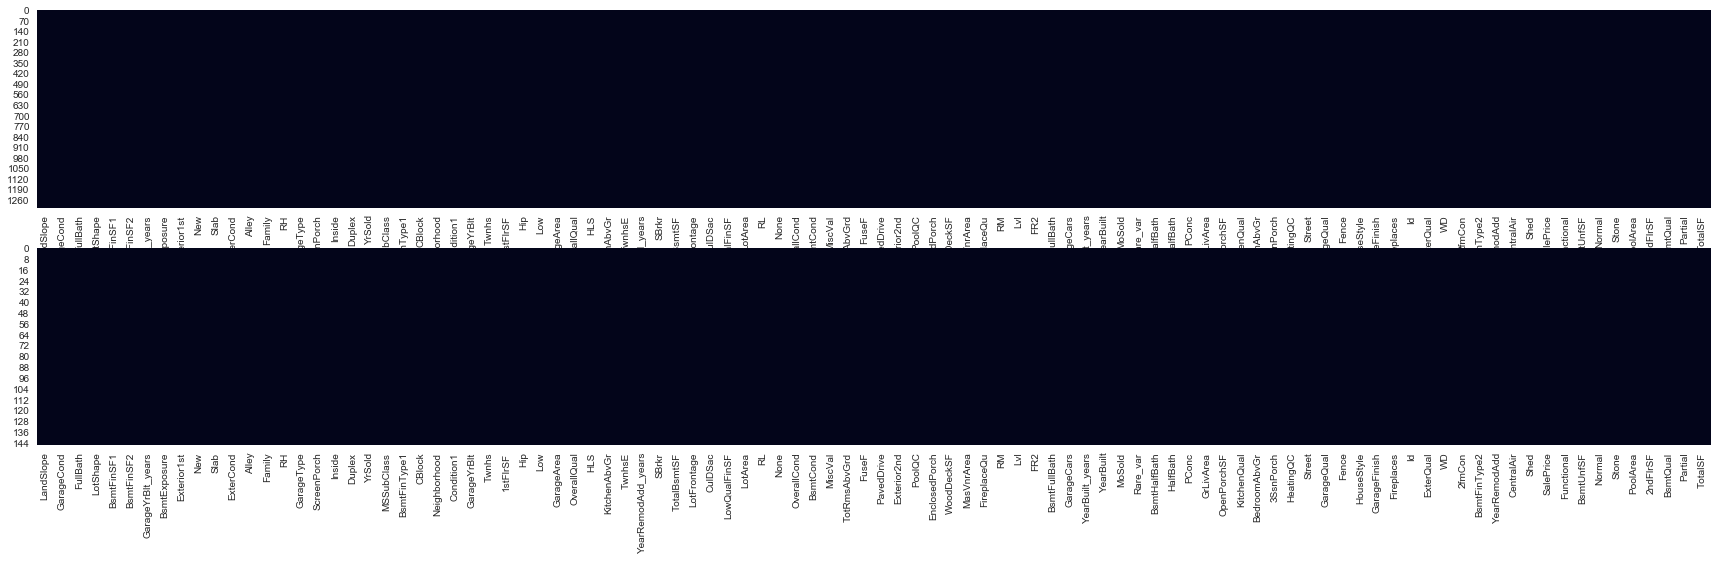

In [84]:
fig, ax = plt.subplots(2,1,figsize=(30,8))
sns.heatmap(X_train.iloc[:,:X_train.shape[1]].isnull(),cbar=False,ax=ax[0])
sns.heatmap(X_test.iloc[:,:X_test.shape[1]].isnull(),cbar=False,ax=ax[1])

In [85]:
## drop dependent feature from dataset
X_train=X_train.drop(['Id','SalePrice'],axis=1)
X_test=X_test.drop(['Id','SalePrice'],axis=1)

In [86]:
X_train.head(2)

,LandSlope,GarageCond,FullBath,LotShape,BsmtFinSF1,BsmtFinSF2,GarageYrBlt_years,BsmtExposure,Exterior1st,New,Slab,ExterCond,Alley,Family,RH,GarageType,ScreenPorch,Inside,Duplex,YrSold,MSSubClass,BsmtFinType1,CBlock,Neighborhood,Condition1,GarageYrBlt,Twnhs,1stFlrSF,Hip,Low,GarageArea,OverallQual,HLS,KitchenAbvGr,TwnhsE,YearRemodAdd_years,SBrkr,TotalBsmtSF,LotFrontage,CulDSac,LowQualFinSF,LotArea,RL,None,OverallCond,BsmtCond,MiscVal,TotRmsAbvGrd,FuseF,PavedDrive,Exterior2nd,PoolQC,EnclosedPorch,WoodDeckSF,MasVnrArea,FireplaceQu,RM,Lvl,FR2,BsmtFullBath,GarageCars,YearBuilt_years,YearBuilt,MoSold,Rare_var,BsmtHalfBath,HalfBath,PConc,GrLivArea,OpenPorchSF,KitchenQual,BedroomAbvGr,3SsnPorch,HeatingQC,Street,GarageQual,Fence,HouseStyle,GarageFinish,Fireplaces,ExterQual,WD,2fmCon,BsmtFinType2,YearRemodAdd,CentralAir,Shed,Functional,BsmtUnfSF,Normal,Stone,PoolArea,2ndFlrSF,BsmtQual,Partial,TotalSF
0,4,5,1,3,1721,0,1.0,4,468,1,0,5,0,0,0,789,0,0,0,2006,20,8,0,76,25,2005.0,0,7.648263,0,0,1134,8,0,1,0,0,1,2077,3.891820,1,0,9.947313,1,1,5,5,0,8,0,4,459,0,0,192,0.0,7,0,1,0,1,3,1,2005,1,0,0,1,1,7.648263,267,7,1,0,7,4,5,0,643,5,1,6,0,0,3,2006,3,0,8,356,0,0,0,0,7,1,2084.648263
1,4,5,2,4,0,0,1.0,4,468,1,0,5,0,0,0,789,0,1,0,2009,20,3,0,24,1130,2008.0,0,7.623642,1,0,834,8,0,1,0,1,1,2046,4.382027,0,0,9.379577,1,0,5,5,0,7,0,4,459,0,0,322,464.0,6,0,1,0,0,3,1,2008,7,0,0,1,1,7.623642,82,6,3,0,7,4,5,0,643,5,1,6,0,0,3,2008,3,0,8,2046,0,1,0,0,7,1,2053.623642


In [87]:
print(X_train.shape)
print(X_test.shape)

(1314, 96)
(146, 96)


In [88]:
print(y_train.shape)
print(y_test.shape)

(1314,)
(146,)


## Correlation

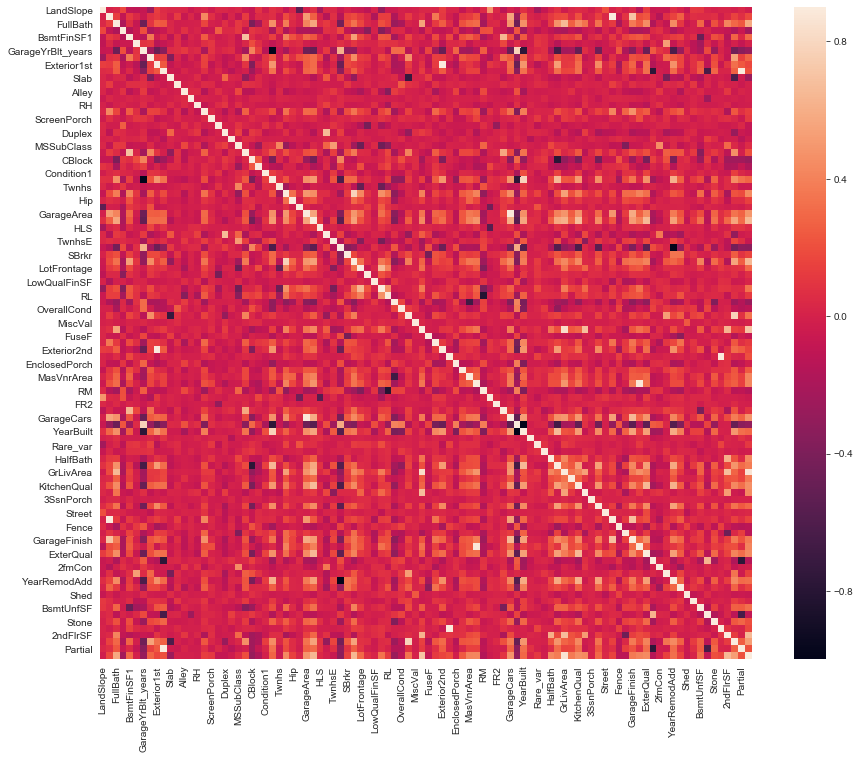

In [89]:
corrmat = X_train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [90]:
num_feats=30

In [91]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_train, y_train,num_feats)
print(str(len(cor_feature)), 'selected features')

30 selected features


## Recursive Feature Elimination

In [93]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rfe_selector = RFE(estimator=RandomForestRegressor(), step=15, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 96 features.
Fitting estimator with 81 features.
Fitting estimator with 66 features.
Fitting estimator with 51 features.
48 selected features


## Lasso - Feature Selection

[0.7581871411235709, 0.7581875260896123, 0.7581879110291557, 0.7581886808287492, 0.7581894505223514, 0.7581902201099594, 0.7581906048640163]
0.01


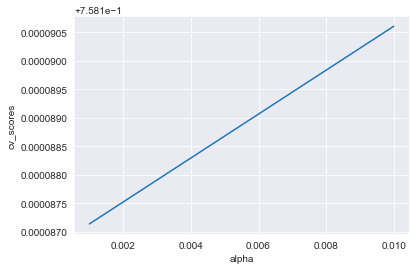

In [94]:
from sklearn.model_selection import cross_val_score

#hyper parameter tuning.Selecting best K
alpha = [0.001,0.002,0.003,0.005,0.007,0.009,0.010]
# empty list that will hold cv scores
cv_scores = []
for a in alpha:
    lasso = Lasso(alpha=a)
    scores = cross_val_score(lasso, X_train, y_train, cv=10, scoring='r2')
    cv_scores.append(scores.mean())

print(cv_scores)

#graphical view
#optimal a
optimal_a_index = cv_scores.index(max(cv_scores))
optimal_a = alpha[optimal_a_index]
print(optimal_a)
# plot misclassification error vs k
plt.plot(alpha, cv_scores)
plt.xlabel('alpha')
plt.ylabel('cv_scores')
plt.show()

In [111]:
lasso_selector = SelectFromModel(Lasso(alpha = 0.1))
lasso_selector.fit(X_train, y_train)

lasso_support = lasso_selector.get_support()
lasso_feature = X_train.loc[:,lasso_support].columns.tolist()
print(str(len(lasso_feature)), 'selected features')

96 selected features


## Random Forest - Feature Selection

In [100]:
from sklearn.ensemble import RandomForestRegressor

rf_selector = SelectFromModel(RandomForestRegressor())
rf_selector.fit(X_train, y_train)

rf_support = rf_selector.get_support()
rf_feature = X_train.loc[:,rf_support].columns.tolist()
print(str(len(rf_feature)), 'selected features')

10 selected features


## XgBoost - Feature Selection

In [101]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor()

xgb_selector = SelectFromModel(xg_reg)
xgb_selector.fit(X_train, y_train)

xgb_support = xgb_selector.get_support()
xgb_feature = X_train.loc[:,xgb_support].columns.tolist()
print(str(len(xgb_feature)), 'selected features')

[19:57:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
17 selected features


In [103]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':X_train.columns, 'Pearson':cor_support,  'RFE':rfe_support,
                                    'Lasso':lasso_support, 'RandomForest':rf_support,'XgBoost':xgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,Pearson,RFE,Lasso,RandomForest,XgBoost,Total
1,TotalSF,True,True,True,True,True,5
2,TotalBsmtSF,True,True,True,True,True,5
3,OverallQual,True,True,True,True,True,5
4,GarageCars,True,True,True,True,True,5
5,BsmtFinSF1,True,True,True,True,True,5
6,1stFlrSF,True,True,True,True,True,5
7,YearRemodAdd,True,True,True,False,True,4
8,LotArea,True,True,True,True,False,4
9,KitchenQual,True,True,True,False,True,4
10,GrLivArea,True,True,True,True,False,4


In [104]:
selected_features = feature_selection_df[feature_selection_df['Total']>=4]['Feature']
selected_features

1          TotalSF
2      TotalBsmtSF
3      OverallQual
4       GarageCars
5       BsmtFinSF1
6         1stFlrSF
7     YearRemodAdd
8          LotArea
9      KitchenQual
10       GrLivArea
11    GarageFinish
12      GarageArea
13        FullBath
14       ExterQual
15        BsmtQual
16        2ndFlrSF
Name: Feature, dtype: object

In [105]:
X_train_selected = X_train[selected_features]
X_train_selected.head()

,TotalSF,TotalBsmtSF,OverallQual,GarageCars,BsmtFinSF1,1stFlrSF,YearRemodAdd,LotArea,KitchenQual,GrLivArea,GarageFinish,GarageArea,FullBath,ExterQual,BsmtQual,2ndFlrSF
0,2084.648263,2077,8,3,1721,7.648263,2006,9.947313,7,7.648263,5,1134,1,6,7,0
1,2053.623642,2046,8,3,0,7.623642,2008,9.379577,6,7.623642,5,834,2,6,7,0
2,1863.074963,896,6,1,448,7.074963,1968,9.472705,6,7.669495,5,509,2,5,6,960
3,1197.694562,644,5,0,351,6.694562,1999,9.220885,5,7.211557,0,0,2,5,5,547
4,1060.960348,1054,6,2,602,6.960348,1969,9.185023,5,6.960348,3,460,1,5,6,0


In [106]:
X_test_selected = X_test[selected_features]
X_test_selected.head()

,TotalSF,TotalBsmtSF,OverallQual,GarageCars,BsmtFinSF1,1stFlrSF,YearRemodAdd,LotArea,KitchenQual,GrLivArea,GarageFinish,GarageArea,FullBath,ExterQual,BsmtQual,2ndFlrSF
0,1491.302496,1484,5,2,998,7.302496,1971,9.412710,5,7.302496,3,487,2,5,6,0
1,1582.948897,1042,5,1,0,6.948897,1950,8.738735,5,7.362645,3,225,1,5,5,534
2,1597.291656,795,7,2,795,7.291656,1994,9.720706,6,7.724447,5,539,2,5,5,795
3,725.918894,0,4,0,0,5.918894,1950,8.630522,4,6.995766,0,0,2,1,0,720
4,1554.689599,804,6,2,556,6.689599,1976,7.744137,6,7.344719,3,440,2,5,6,744


In [107]:
X_train_selected.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_train_selected.csv',index=False)
X_test_selected.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/X_test_selected.csv',index=False)
y_train.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_train_selected.csv',index=False)
y_test.to_csv('C:/Users/Administrator/ML/House Prices Advanced Regression Techniques/Storage/y_test_selected.csv',index=False)